# Installing Dependencies


In [ ]:
!pip install super-gradients
!pip install roboflow
!pip install supervision
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 106.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.6/408.6 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (set

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 928.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 1.3 MB/s eta 0:00:00


# Downloading Dataset and Setting-up Dataset Parameters


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="8ge8IIz0w090vWOlkGMC")
project = rf.workspace("test-flg7l").project("tracked-oranges")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val

[2024-05-26 07:47:07] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2024-05-26 07:47:16] INFO - utils.py - NumExpr defaulting to 2 threads.


In [ ]:
from super_gradients.training import Trainer

CHECKPOINT_DIR = 'checkpoints'
trainer = Trainer(experiment_name='my_first_yolonas_run', ckpt_root_dir=CHECKPOINT_DIR)

In [ ]:
dataset_params = {
    'data_dir':'/content/tracked-oranges-2',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['orange']
}

In [ ]:
from IPython.display import clear_output

train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':16,
        'num_workers':2
    }
)

clear_output()

In [ ]:
train_data.dataset.transforms

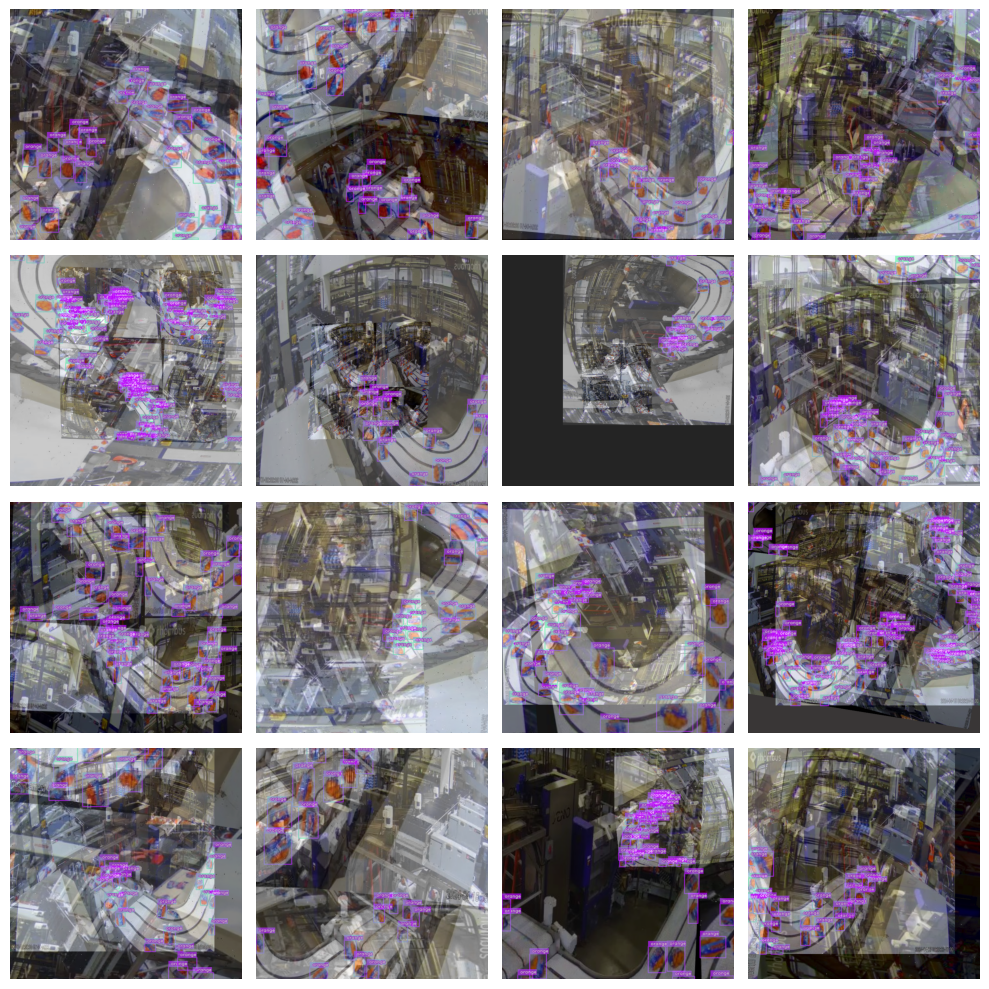

In [ ]:
train_data.dataset.plot()

# Training YOLO-NAS

Put the model size wanter
*   yolo_nas_s
*   yolo_nas_m
*   yolo_nas_l





In [ ]:
from super_gradients.training import models
model = models.get('yolo_nas_s',
                   num_classes=len(dataset_params['classes'])
                   )

In the block below, setup the epoch numbers and batch sizes

In [ ]:
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback

train_params = {
    # ENABLING SILENT MODE
    'silent_mode': False,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    # ONLY TRAINING FOR 10 EPOCHS FOR THIS EXAMPLE NOTEBOOK
    "max_epochs": 50,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

A reg_max argument is not needed for PPYoloE loss anymore. It is deprecated since SG 3.6.0 and will be removed in the SG 3.8.0.You can safely omit this argument as it is not used anymore and we infer it automatically from model's outputs


In [ ]:
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2024-05-26 07:48:40] INFO - sg_trainer.py - Starting a new run with `run_id=RUN_20240526_074840_891351`
[2024-05-26 07:48:40] INFO - sg_trainer.py - Checkpoints directory: checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351
[2024-05-26 07:48:40] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/console_May26_07_48_40.txt


Object name `linear_epoch_step` is now deprecated. Please replace it with `LinearEpochLRWarmup`.
initialize_param_groups and update_param_groups usages are deprecated since 3.4.0, will be removed in 3.5.0 and have no effect. 
 Assign different learning rates by passing a mapping of layer name prefixes to lr values through initial_lr training hyperparameter (i.e initial_lr={'backbone': 0.01, 'default':0.1})
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
[2024-05-26 07:48:43] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Full dataset size:            108        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_s

SUMMARY OF EPOCH 0
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.4417
│   ├── Ppyoloeloss/loss_iou = 2.0451
│   ├── Ppyoloeloss/loss_dfl = 1.4163
│   └── Ppyoloeloss/loss = 3.9031
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.2604
    ├── Ppyoloeloss/loss_iou = 2.3025
    ├── Ppyoloeloss/loss_dfl = 1.4226
    ├── Ppyoloeloss/loss = 3.9855
    ├── Precision@0.50 = 0.0
    ├── Recall@0.50 = 0.0
    ├── Map@0.50 = 0.0
    ├── F1@0.50 = 0.0
    └── Best_score_threshold = 0.0



Validating epoch 1: 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


SUMMARY OF EPOCH 1
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.5313
│   │   ├── Epoch N-1      = 0.4417 (↗ 0.0896)
│   │   └── Best until now = 0.4417 (↗ 0.0896)
│   ├── Ppyoloeloss/loss_iou = 1.813
│   │   ├── Epoch N-1      = 2.0451 (↘ -0.2321)
│   │   └── Best until now = 2.0451 (↘ -0.2321)
│   ├── Ppyoloeloss/loss_dfl = 1.3419
│   │   ├── Epoch N-1      = 1.4163 (↘ -0.0744)
│   │   └── Best until now = 1.4163 (↘ -0.0744)
│   └── Ppyoloeloss/loss = 3.6862
│       ├── Epoch N-1      = 3.9031 (↘ -0.2169)
│       └── Best until now = 3.9031 (↘ -0.2169)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.2534
    │   ├── Epoch N-1      = 0.2604 (↘ -0.007)
    │   └── Best until now = 0.2604 (↘ -0.007)
    ├── Ppyoloeloss/loss_iou = 2.3026
    │   ├── Epoch N-1      = 2.3025 (↗ 0.0002)
    │   └── Best until now = 2.3025 (↗ 0.0002)
    ├── Ppyoloeloss/loss_dfl = 1.4347
    │   ├── Epoch N-1      = 1.4226 (↗ 0.012)
    │   └── Best until now = 1.4226 (↗ 0.012)
    ├── Ppyoloeloss/loss = 3.9907

Validating epoch 2: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


SUMMARY OF EPOCH 2
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7286
│   │   ├── Epoch N-1      = 0.5313 (↗ 0.1973)
│   │   └── Best until now = 0.4417 (↗ 0.2869)
│   ├── Ppyoloeloss/loss_iou = 1.4054
│   │   ├── Epoch N-1      = 1.813  (↘ -0.4076)
│   │   └── Best until now = 1.813  (↘ -0.4076)
│   ├── Ppyoloeloss/loss_dfl = 1.0354
│   │   ├── Epoch N-1      = 1.3419 (↘ -0.3065)
│   │   └── Best until now = 1.3419 (↘ -0.3065)
│   └── Ppyoloeloss/loss = 3.1694
│       ├── Epoch N-1      = 3.6862 (↘ -0.5168)
│       └── Best until now = 3.6862 (↘ -0.5168)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.2182
    │   ├── Epoch N-1      = 0.2534 (↘ -0.0351)
    │   └── Best until now = 0.2534 (↘ -0.0351)
    ├── Ppyoloeloss/loss_iou = 2.293
    │   ├── Epoch N-1      = 2.3026 (↘ -0.0097)
    │   └── Best until now = 2.3025 (↘ -0.0095)
    ├── Ppyoloeloss/loss_dfl = 1.3813
    │   ├── Epoch N-1      = 1.4347 (↘ -0.0533)
    │   └── Best until now = 1.4226 (↘ -0.0413)
    ├── Ppyoloeloss/loss 

Validating epoch 3: 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]
[2024-05-26 07:49:35] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:49:35] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.008678531274199486


SUMMARY OF EPOCH 3
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7918
│   │   ├── Epoch N-1      = 0.7286 (↗ 0.0631)
│   │   └── Best until now = 0.4417 (↗ 0.35)
│   ├── Ppyoloeloss/loss_iou = 1.1446
│   │   ├── Epoch N-1      = 1.4054 (↘ -0.2608)
│   │   └── Best until now = 1.4054 (↘ -0.2608)
│   ├── Ppyoloeloss/loss_dfl = 0.8227
│   │   ├── Epoch N-1      = 1.0354 (↘ -0.2127)
│   │   └── Best until now = 1.0354 (↘ -0.2127)
│   └── Ppyoloeloss/loss = 2.7591
│       ├── Epoch N-1      = 3.1694 (↘ -0.4103)
│       └── Best until now = 3.1694 (↘ -0.4103)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7811
    │   ├── Epoch N-1      = 0.2182 (↗ 0.5629)
    │   └── Best until now = 0.2182 (↗ 0.5629)
    ├── Ppyoloeloss/loss_iou = 1.7682
    │   ├── Epoch N-1      = 2.293  (↘ -0.5248)
    │   └── Best until now = 2.293  (↘ -0.5248)
    ├── Ppyoloeloss/loss_dfl = 0.8568
    │   ├── Epoch N-1      = 1.3813 (↘ -0.5245)
    │   └── Best until now = 1.3813 (↘ -0.5245)
    ├── Ppyoloeloss/loss = 3

Validating epoch 4: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
[2024-05-26 07:49:50] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:49:50] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.2440827488899231


SUMMARY OF EPOCH 4
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7558
│   │   ├── Epoch N-1      = 0.7918 (↘ -0.0359)
│   │   └── Best until now = 0.4417 (↗ 0.3141)
│   ├── Ppyoloeloss/loss_iou = 1.0228
│   │   ├── Epoch N-1      = 1.1446 (↘ -0.1218)
│   │   └── Best until now = 1.1446 (↘ -0.1218)
│   ├── Ppyoloeloss/loss_dfl = 0.6984
│   │   ├── Epoch N-1      = 0.8227 (↘ -0.1243)
│   │   └── Best until now = 0.8227 (↘ -0.1243)
│   └── Ppyoloeloss/loss = 2.477
│       ├── Epoch N-1      = 2.7591 (↘ -0.2821)
│       └── Best until now = 2.7591 (↘ -0.2821)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.92
    │   ├── Epoch N-1      = 0.7811 (↗ 0.1389)
    │   └── Best until now = 0.2182 (↗ 0.7018)
    ├── Ppyoloeloss/loss_iou = 1.3175
    │   ├── Epoch N-1      = 1.7682 (↘ -0.4507)
    │   └── Best until now = 1.7682 (↘ -0.4507)
    ├── Ppyoloeloss/loss_dfl = 0.6973
    │   ├── Epoch N-1      = 0.8568 (↘ -0.1596)
    │   └── Best until now = 0.8568 (↘ -0.1596)
    ├── Ppyoloeloss/loss = 2

Validating epoch 5: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]
[2024-05-26 07:50:05] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:50:05] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.5003718137741089


SUMMARY OF EPOCH 5
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7515
│   │   ├── Epoch N-1      = 0.7558 (↘ -0.0043)
│   │   └── Best until now = 0.4417 (↗ 0.3098)
│   ├── Ppyoloeloss/loss_iou = 0.9484
│   │   ├── Epoch N-1      = 1.0228 (↘ -0.0744)
│   │   └── Best until now = 1.0228 (↘ -0.0744)
│   ├── Ppyoloeloss/loss_dfl = 0.6561
│   │   ├── Epoch N-1      = 0.6984 (↘ -0.0423)
│   │   └── Best until now = 0.6984 (↘ -0.0423)
│   └── Ppyoloeloss/loss = 2.356
│       ├── Epoch N-1      = 2.477  (↘ -0.1211)
│       └── Best until now = 2.477  (↘ -0.1211)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8789
    │   ├── Epoch N-1      = 0.92   (↘ -0.0411)
    │   └── Best until now = 0.2182 (↗ 0.6607)
    ├── Ppyoloeloss/loss_iou = 1.08
    │   ├── Epoch N-1      = 1.3175 (↘ -0.2375)
    │   └── Best until now = 1.3175 (↘ -0.2375)
    ├── Ppyoloeloss/loss_dfl = 0.6184
    │   ├── Epoch N-1      = 0.6973 (↘ -0.0788)
    │   └── Best until now = 0.6973 (↘ -0.0788)
    ├── Ppyoloeloss/loss = 

Validating epoch 6: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
[2024-05-26 07:50:23] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:50:23] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.6728600859642029


SUMMARY OF EPOCH 6
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7568
│   │   ├── Epoch N-1      = 0.7515 (↗ 0.0053)
│   │   └── Best until now = 0.4417 (↗ 0.315)
│   ├── Ppyoloeloss/loss_iou = 0.9214
│   │   ├── Epoch N-1      = 0.9484 (↘ -0.027)
│   │   └── Best until now = 0.9484 (↘ -0.027)
│   ├── Ppyoloeloss/loss_dfl = 0.6351
│   │   ├── Epoch N-1      = 0.6561 (↘ -0.0209)
│   │   └── Best until now = 0.6561 (↘ -0.0209)
│   └── Ppyoloeloss/loss = 2.3132
│       ├── Epoch N-1      = 2.356  (↘ -0.0427)
│       └── Best until now = 2.356  (↘ -0.0427)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7483
    │   ├── Epoch N-1      = 0.8789 (↘ -0.1305)
    │   └── Best until now = 0.2182 (↗ 0.5301)
    ├── Ppyoloeloss/loss_iou = 0.888
    │   ├── Epoch N-1      = 1.08   (↘ -0.192)
    │   └── Best until now = 1.08   (↘ -0.192)
    ├── Ppyoloeloss/loss_dfl = 0.5596
    │   ├── Epoch N-1      = 0.6184 (↘ -0.0588)
    │   └── Best until now = 0.6184 (↘ -0.0588)
    ├── Ppyoloeloss/loss = 2.19

Validating epoch 7: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
[2024-05-26 07:50:42] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:50:42] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7449319958686829


SUMMARY OF EPOCH 7
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7578
│   │   ├── Epoch N-1      = 0.7568 (↗ 0.001)
│   │   └── Best until now = 0.4417 (↗ 0.316)
│   ├── Ppyoloeloss/loss_iou = 0.881
│   │   ├── Epoch N-1      = 0.9214 (↘ -0.0404)
│   │   └── Best until now = 0.9214 (↘ -0.0404)
│   ├── Ppyoloeloss/loss_dfl = 0.6103
│   │   ├── Epoch N-1      = 0.6351 (↘ -0.0248)
│   │   └── Best until now = 0.6351 (↘ -0.0248)
│   └── Ppyoloeloss/loss = 2.2491
│       ├── Epoch N-1      = 2.3132 (↘ -0.0641)
│       └── Best until now = 2.3132 (↘ -0.0641)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7243
    │   ├── Epoch N-1      = 0.7483 (↘ -0.024)
    │   └── Best until now = 0.2182 (↗ 0.5061)
    ├── Ppyoloeloss/loss_iou = 0.8236
    │   ├── Epoch N-1      = 0.888  (↘ -0.0644)
    │   └── Best until now = 0.888  (↘ -0.0644)
    ├── Ppyoloeloss/loss_dfl = 0.5351
    │   ├── Epoch N-1      = 0.5596 (↘ -0.0245)
    │   └── Best until now = 0.5596 (↘ -0.0245)
    ├── Ppyoloeloss/loss = 2.

Validating epoch 8: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]
[2024-05-26 07:50:59] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:50:59] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.7550416588783264


SUMMARY OF EPOCH 8
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7459
│   │   ├── Epoch N-1      = 0.7578 (↘ -0.0119)
│   │   └── Best until now = 0.4417 (↗ 0.3041)
│   ├── Ppyoloeloss/loss_iou = 0.8343
│   │   ├── Epoch N-1      = 0.881  (↘ -0.0467)
│   │   └── Best until now = 0.881  (↘ -0.0467)
│   ├── Ppyoloeloss/loss_dfl = 0.581
│   │   ├── Epoch N-1      = 0.6103 (↘ -0.0293)
│   │   └── Best until now = 0.6103 (↘ -0.0293)
│   └── Ppyoloeloss/loss = 2.1612
│       ├── Epoch N-1      = 2.2491 (↘ -0.0879)
│       └── Best until now = 2.2491 (↘ -0.0879)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7567
    │   ├── Epoch N-1      = 0.7243 (↗ 0.0324)
    │   └── Best until now = 0.2182 (↗ 0.5385)
    ├── Ppyoloeloss/loss_iou = 0.8222
    │   ├── Epoch N-1      = 0.8236 (↘ -0.0013)
    │   └── Best until now = 0.8236 (↘ -0.0013)
    ├── Ppyoloeloss/loss_dfl = 0.5346
    │   ├── Epoch N-1      = 0.5351 (↘ -0.0005)
    │   └── Best until now = 0.5351 (↘ -0.0005)
    ├── Ppyoloeloss/loss =

Validating epoch 9: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
[2024-05-26 07:51:39] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:51:39] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8176872134208679


SUMMARY OF EPOCH 9
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7469
│   │   ├── Epoch N-1      = 0.7459 (↗ 0.001)
│   │   └── Best until now = 0.4417 (↗ 0.3051)
│   ├── Ppyoloeloss/loss_iou = 0.8197
│   │   ├── Epoch N-1      = 0.8343 (↘ -0.0146)
│   │   └── Best until now = 0.8343 (↘ -0.0146)
│   ├── Ppyoloeloss/loss_dfl = 0.5778
│   │   ├── Epoch N-1      = 0.581  (↘ -0.0032)
│   │   └── Best until now = 0.581  (↘ -0.0032)
│   └── Ppyoloeloss/loss = 2.1443
│       ├── Epoch N-1      = 2.1612 (↘ -0.0168)
│       └── Best until now = 2.1612 (↘ -0.0168)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7495
    │   ├── Epoch N-1      = 0.7567 (↘ -0.0072)
    │   └── Best until now = 0.2182 (↗ 0.5313)
    ├── Ppyoloeloss/loss_iou = 0.739
    │   ├── Epoch N-1      = 0.8222 (↘ -0.0833)
    │   └── Best until now = 0.8222 (↘ -0.0833)
    ├── Ppyoloeloss/loss_dfl = 0.5044
    │   ├── Epoch N-1      = 0.5346 (↘ -0.0302)
    │   └── Best until now = 0.5346 (↘ -0.0302)
    ├── Ppyoloeloss/loss = 

Validating epoch 10: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]
[2024-05-26 07:51:56] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:51:56] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8246327638626099


SUMMARY OF EPOCH 10
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.729
│   │   ├── Epoch N-1      = 0.7469 (↘ -0.0178)
│   │   └── Best until now = 0.4417 (↗ 0.2873)
│   ├── Ppyoloeloss/loss_iou = 0.783
│   │   ├── Epoch N-1      = 0.8197 (↘ -0.0367)
│   │   └── Best until now = 0.8197 (↘ -0.0367)
│   ├── Ppyoloeloss/loss_dfl = 0.5641
│   │   ├── Epoch N-1      = 0.5778 (↘ -0.0136)
│   │   └── Best until now = 0.5778 (↘ -0.0136)
│   └── Ppyoloeloss/loss = 2.0761
│       ├── Epoch N-1      = 2.1443 (↘ -0.0682)
│       └── Best until now = 2.1443 (↘ -0.0682)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7785
    │   ├── Epoch N-1      = 0.7495 (↗ 0.029)
    │   └── Best until now = 0.2182 (↗ 0.5603)
    ├── Ppyoloeloss/loss_iou = 0.7195
    │   ├── Epoch N-1      = 0.739  (↘ -0.0195)
    │   └── Best until now = 0.739  (↘ -0.0195)
    ├── Ppyoloeloss/loss_dfl = 0.4874
    │   ├── Epoch N-1      = 0.5044 (↘ -0.017)
    │   └── Best until now = 0.5044 (↘ -0.017)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 11: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


SUMMARY OF EPOCH 11
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7282
│   │   ├── Epoch N-1      = 0.729  (↘ -0.0008)
│   │   └── Best until now = 0.4417 (↗ 0.2865)
│   ├── Ppyoloeloss/loss_iou = 0.7875
│   │   ├── Epoch N-1      = 0.783  (↗ 0.0046)
│   │   └── Best until now = 0.783  (↗ 0.0046)
│   ├── Ppyoloeloss/loss_dfl = 0.5295
│   │   ├── Epoch N-1      = 0.5641 (↘ -0.0346)
│   │   └── Best until now = 0.5641 (↘ -0.0346)
│   └── Ppyoloeloss/loss = 2.0453
│       ├── Epoch N-1      = 2.0761 (↘ -0.0308)
│       └── Best until now = 2.0761 (↘ -0.0308)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7699
    │   ├── Epoch N-1      = 0.7785 (↘ -0.0087)
    │   └── Best until now = 0.2182 (↗ 0.5516)
    ├── Ppyoloeloss/loss_iou = 0.7325
    │   ├── Epoch N-1      = 0.7195 (↗ 0.013)
    │   └── Best until now = 0.7195 (↗ 0.013)
    ├── Ppyoloeloss/loss_dfl = 0.4938
    │   ├── Epoch N-1      = 0.4874 (↗ 0.0065)
    │   └── Best until now = 0.4874 (↗ 0.0065)
    ├── Ppyoloeloss/loss = 1.99

Validating epoch 12: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]
[2024-05-26 07:52:45] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:52:45] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8378549814224243


SUMMARY OF EPOCH 12
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.745
│   │   ├── Epoch N-1      = 0.7282 (↗ 0.0167)
│   │   └── Best until now = 0.4417 (↗ 0.3032)
│   ├── Ppyoloeloss/loss_iou = 0.761
│   │   ├── Epoch N-1      = 0.7875 (↘ -0.0266)
│   │   └── Best until now = 0.783  (↘ -0.022)
│   ├── Ppyoloeloss/loss_dfl = 0.536
│   │   ├── Epoch N-1      = 0.5295 (↗ 0.0065)
│   │   └── Best until now = 0.5295 (↗ 0.0065)
│   └── Ppyoloeloss/loss = 2.042
│       ├── Epoch N-1      = 2.0453 (↘ -0.0033)
│       └── Best until now = 2.0453 (↘ -0.0033)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7478
    │   ├── Epoch N-1      = 0.7699 (↘ -0.022)
    │   └── Best until now = 0.2182 (↗ 0.5296)
    ├── Ppyoloeloss/loss_iou = 0.6896
    │   ├── Epoch N-1      = 0.7325 (↘ -0.0429)
    │   └── Best until now = 0.7195 (↘ -0.0299)
    ├── Ppyoloeloss/loss_dfl = 0.4664
    │   ├── Epoch N-1      = 0.4938 (↘ -0.0274)
    │   └── Best until now = 0.4874 (↘ -0.021)
    ├── Ppyoloeloss/loss = 1.9039

Validating epoch 13: 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]
[2024-05-26 07:53:13] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:53:13] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8456212282180786


SUMMARY OF EPOCH 13
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7341
│   │   ├── Epoch N-1      = 0.745  (↘ -0.0109)
│   │   └── Best until now = 0.4417 (↗ 0.2923)
│   ├── Ppyoloeloss/loss_iou = 0.7701
│   │   ├── Epoch N-1      = 0.761  (↗ 0.0092)
│   │   └── Best until now = 0.761  (↗ 0.0092)
│   ├── Ppyoloeloss/loss_dfl = 0.5153
│   │   ├── Epoch N-1      = 0.536  (↘ -0.0207)
│   │   └── Best until now = 0.5295 (↘ -0.0142)
│   └── Ppyoloeloss/loss = 2.0195
│       ├── Epoch N-1      = 2.042  (↘ -0.0224)
│       └── Best until now = 2.042  (↘ -0.0224)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7534
    │   ├── Epoch N-1      = 0.7478 (↗ 0.0055)
    │   └── Best until now = 0.2182 (↗ 0.5351)
    ├── Ppyoloeloss/loss_iou = 0.7058
    │   ├── Epoch N-1      = 0.6896 (↗ 0.0162)
    │   └── Best until now = 0.6896 (↗ 0.0162)
    ├── Ppyoloeloss/loss_dfl = 0.4713
    │   ├── Epoch N-1      = 0.4664 (↗ 0.0049)
    │   └── Best until now = 0.4664 (↗ 0.0049)
    ├── Ppyoloeloss/loss = 1.9

Validating epoch 14: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]
[2024-05-26 07:53:48] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:53:48] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8739103674888611


SUMMARY OF EPOCH 14
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7314
│   │   ├── Epoch N-1      = 0.7341 (↘ -0.0027)
│   │   └── Best until now = 0.4417 (↗ 0.2896)
│   ├── Ppyoloeloss/loss_iou = 0.7527
│   │   ├── Epoch N-1      = 0.7701 (↘ -0.0175)
│   │   └── Best until now = 0.761  (↘ -0.0083)
│   ├── Ppyoloeloss/loss_dfl = 0.5071
│   │   ├── Epoch N-1      = 0.5153 (↘ -0.0082)
│   │   └── Best until now = 0.5153 (↘ -0.0082)
│   └── Ppyoloeloss/loss = 1.9912
│       ├── Epoch N-1      = 2.0195 (↘ -0.0284)
│       └── Best until now = 2.0195 (↘ -0.0284)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7624
    │   ├── Epoch N-1      = 0.7534 (↗ 0.0091)
    │   └── Best until now = 0.2182 (↗ 0.5442)
    ├── Ppyoloeloss/loss_iou = 0.6807
    │   ├── Epoch N-1      = 0.7058 (↘ -0.0251)
    │   └── Best until now = 0.6896 (↘ -0.0089)
    ├── Ppyoloeloss/loss_dfl = 0.4608
    │   ├── Epoch N-1      = 0.4713 (↘ -0.0106)
    │   └── Best until now = 0.4664 (↘ -0.0057)
    ├── Ppyoloeloss/loss

Validating epoch 15: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
[2024-05-26 07:54:05] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:54:05] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.8977852463722229


SUMMARY OF EPOCH 15
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7391
│   │   ├── Epoch N-1      = 0.7314 (↗ 0.0077)
│   │   └── Best until now = 0.4417 (↗ 0.2974)
│   ├── Ppyoloeloss/loss_iou = 0.7472
│   │   ├── Epoch N-1      = 0.7527 (↘ -0.0055)
│   │   └── Best until now = 0.7527 (↘ -0.0055)
│   ├── Ppyoloeloss/loss_dfl = 0.5293
│   │   ├── Epoch N-1      = 0.5071 (↗ 0.0222)
│   │   └── Best until now = 0.5071 (↗ 0.0222)
│   └── Ppyoloeloss/loss = 2.0155
│       ├── Epoch N-1      = 1.9912 (↗ 0.0244)
│       └── Best until now = 1.9912 (↗ 0.0244)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7774
    │   ├── Epoch N-1      = 0.7624 (↗ 0.015)
    │   └── Best until now = 0.2182 (↗ 0.5592)
    ├── Ppyoloeloss/loss_iou = 0.666
    │   ├── Epoch N-1      = 0.6807 (↘ -0.0147)
    │   └── Best until now = 0.6807 (↘ -0.0147)
    ├── Ppyoloeloss/loss_dfl = 0.4522
    │   ├── Epoch N-1      = 0.4608 (↘ -0.0086)
    │   └── Best until now = 0.4608 (↘ -0.0086)
    ├── Ppyoloeloss/loss = 1.89

Validating epoch 16: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


SUMMARY OF EPOCH 16
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7285
│   │   ├── Epoch N-1      = 0.7391 (↘ -0.0106)
│   │   └── Best until now = 0.4417 (↗ 0.2868)
│   ├── Ppyoloeloss/loss_iou = 0.7531
│   │   ├── Epoch N-1      = 0.7472 (↗ 0.0059)
│   │   └── Best until now = 0.7472 (↗ 0.0059)
│   ├── Ppyoloeloss/loss_dfl = 0.5028
│   │   ├── Epoch N-1      = 0.5293 (↘ -0.0265)
│   │   └── Best until now = 0.5071 (↘ -0.0043)
│   └── Ppyoloeloss/loss = 1.9844
│       ├── Epoch N-1      = 2.0155 (↘ -0.0311)
│       └── Best until now = 1.9912 (↘ -0.0068)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7724
    │   ├── Epoch N-1      = 0.7774 (↘ -0.005)
    │   └── Best until now = 0.2182 (↗ 0.5542)
    ├── Ppyoloeloss/loss_iou = 0.6668
    │   ├── Epoch N-1      = 0.666  (↗ 0.0008)
    │   └── Best until now = 0.666  (↗ 0.0008)
    ├── Ppyoloeloss/loss_dfl = 0.453
    │   ├── Epoch N-1      = 0.4522 (↗ 0.0009)
    │   └── Best until now = 0.4522 (↗ 0.0009)
    ├── Ppyoloeloss/loss = 1.89

Validating epoch 17: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]


SUMMARY OF EPOCH 17
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7334
│   │   ├── Epoch N-1      = 0.7285 (↗ 0.0049)
│   │   └── Best until now = 0.4417 (↗ 0.2917)
│   ├── Ppyoloeloss/loss_iou = 0.7213
│   │   ├── Epoch N-1      = 0.7531 (↘ -0.0317)
│   │   └── Best until now = 0.7472 (↘ -0.0258)
│   ├── Ppyoloeloss/loss_dfl = 0.5093
│   │   ├── Epoch N-1      = 0.5028 (↗ 0.0066)
│   │   └── Best until now = 0.5028 (↗ 0.0066)
│   └── Ppyoloeloss/loss = 1.9641
│       ├── Epoch N-1      = 1.9844 (↘ -0.0203)
│       └── Best until now = 1.9844 (↘ -0.0203)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7381
    │   ├── Epoch N-1      = 0.7724 (↘ -0.0343)
    │   └── Best until now = 0.2182 (↗ 0.5199)
    ├── Ppyoloeloss/loss_iou = 0.643
    │   ├── Epoch N-1      = 0.6668 (↘ -0.0237)
    │   └── Best until now = 0.666  (↘ -0.0229)
    ├── Ppyoloeloss/loss_dfl = 0.443
    │   ├── Epoch N-1      = 0.453  (↘ -0.01)
    │   └── Best until now = 0.4522 (↘ -0.0091)
    ├── Ppyoloeloss/loss = 1.8

Validating epoch 18: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


SUMMARY OF EPOCH 18
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7374
│   │   ├── Epoch N-1      = 0.7334 (↗ 0.004)
│   │   └── Best until now = 0.4417 (↗ 0.2957)
│   ├── Ppyoloeloss/loss_iou = 0.7436
│   │   ├── Epoch N-1      = 0.7213 (↗ 0.0223)
│   │   └── Best until now = 0.7213 (↗ 0.0223)
│   ├── Ppyoloeloss/loss_dfl = 0.4914
│   │   ├── Epoch N-1      = 0.5093 (↘ -0.0179)
│   │   └── Best until now = 0.5028 (↘ -0.0114)
│   └── Ppyoloeloss/loss = 1.9724
│       ├── Epoch N-1      = 1.9641 (↗ 0.0083)
│       └── Best until now = 1.9641 (↗ 0.0083)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7557
    │   ├── Epoch N-1      = 0.7381 (↗ 0.0176)
    │   └── Best until now = 0.2182 (↗ 0.5374)
    ├── Ppyoloeloss/loss_iou = 0.6687
    │   ├── Epoch N-1      = 0.643  (↗ 0.0256)
    │   └── Best until now = 0.643  (↗ 0.0256)
    ├── Ppyoloeloss/loss_dfl = 0.4518
    │   ├── Epoch N-1      = 0.443  (↗ 0.0087)
    │   └── Best until now = 0.443  (↗ 0.0087)
    ├── Ppyoloeloss/loss = 1.8761


Validating epoch 19: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]
[2024-05-26 07:55:51] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:55:51] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9277725219726562


SUMMARY OF EPOCH 19
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.733
│   │   ├── Epoch N-1      = 0.7374 (↘ -0.0044)
│   │   └── Best until now = 0.4417 (↗ 0.2913)
│   ├── Ppyoloeloss/loss_iou = 0.7119
│   │   ├── Epoch N-1      = 0.7436 (↘ -0.0317)
│   │   └── Best until now = 0.7213 (↘ -0.0094)
│   ├── Ppyoloeloss/loss_dfl = 0.492
│   │   ├── Epoch N-1      = 0.4914 (↗ 0.0006)
│   │   └── Best until now = 0.4914 (↗ 0.0006)
│   └── Ppyoloeloss/loss = 1.9369
│       ├── Epoch N-1      = 1.9724 (↘ -0.0355)
│       └── Best until now = 1.9641 (↘ -0.0272)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7401
    │   ├── Epoch N-1      = 0.7557 (↘ -0.0156)
    │   └── Best until now = 0.2182 (↗ 0.5218)
    ├── Ppyoloeloss/loss_iou = 0.6464
    │   ├── Epoch N-1      = 0.6687 (↘ -0.0223)
    │   └── Best until now = 0.643  (↗ 0.0033)
    ├── Ppyoloeloss/loss_dfl = 0.4383
    │   ├── Epoch N-1      = 0.4518 (↘ -0.0135)
    │   └── Best until now = 0.443  (↘ -0.0047)
    ├── Ppyoloeloss/loss = 1

Validating epoch 20: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


SUMMARY OF EPOCH 20
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7333
│   │   ├── Epoch N-1      = 0.733  (↗ 0.0003)
│   │   └── Best until now = 0.4417 (↗ 0.2915)
│   ├── Ppyoloeloss/loss_iou = 0.72
│   │   ├── Epoch N-1      = 0.7119 (↗ 0.0081)
│   │   └── Best until now = 0.7119 (↗ 0.0081)
│   ├── Ppyoloeloss/loss_dfl = 0.4978
│   │   ├── Epoch N-1      = 0.492  (↗ 0.0058)
│   │   └── Best until now = 0.4914 (↗ 0.0064)
│   └── Ppyoloeloss/loss = 1.9511
│       ├── Epoch N-1      = 1.9369 (↗ 0.0142)
│       └── Best until now = 1.9369 (↗ 0.0142)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.8201
    │   ├── Epoch N-1      = 0.7401 (↗ 0.08)
    │   └── Best until now = 0.2182 (↗ 0.6019)
    ├── Ppyoloeloss/loss_iou = 0.6468
    │   ├── Epoch N-1      = 0.6464 (↗ 0.0005)
    │   └── Best until now = 0.643  (↗ 0.0038)
    ├── Ppyoloeloss/loss_dfl = 0.4375
    │   ├── Epoch N-1      = 0.4383 (↘ -0.0008)
    │   └── Best until now = 0.4383 (↘ -0.0008)
    ├── Ppyoloeloss/loss = 1.9044
   

Validating epoch 21: 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


SUMMARY OF EPOCH 21
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7432
│   │   ├── Epoch N-1      = 0.7333 (↗ 0.01)
│   │   └── Best until now = 0.4417 (↗ 0.3015)
│   ├── Ppyoloeloss/loss_iou = 0.74
│   │   ├── Epoch N-1      = 0.72   (↗ 0.0199)
│   │   └── Best until now = 0.7119 (↗ 0.028)
│   ├── Ppyoloeloss/loss_dfl = 0.502
│   │   ├── Epoch N-1      = 0.4978 (↗ 0.0042)
│   │   └── Best until now = 0.4914 (↗ 0.0106)
│   └── Ppyoloeloss/loss = 1.9852
│       ├── Epoch N-1      = 1.9511 (↗ 0.0341)
│       └── Best until now = 1.9369 (↗ 0.0483)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7503
    │   ├── Epoch N-1      = 0.8201 (↘ -0.0698)
    │   └── Best until now = 0.2182 (↗ 0.5321)
    ├── Ppyoloeloss/loss_iou = 0.6383
    │   ├── Epoch N-1      = 0.6468 (↘ -0.0086)
    │   └── Best until now = 0.643  (↘ -0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.434
    │   ├── Epoch N-1      = 0.4375 (↘ -0.0035)
    │   └── Best until now = 0.4375 (↘ -0.0035)
    ├── Ppyoloeloss/loss = 1.8226
   

Validating epoch 22: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


SUMMARY OF EPOCH 22
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7285
│   │   ├── Epoch N-1      = 0.7432 (↘ -0.0147)
│   │   └── Best until now = 0.4417 (↗ 0.2868)
│   ├── Ppyoloeloss/loss_iou = 0.7058
│   │   ├── Epoch N-1      = 0.74   (↘ -0.0341)
│   │   └── Best until now = 0.7119 (↘ -0.0061)
│   ├── Ppyoloeloss/loss_dfl = 0.4914
│   │   ├── Epoch N-1      = 0.502  (↘ -0.0106)
│   │   └── Best until now = 0.4914 (↗ 0.0)
│   └── Ppyoloeloss/loss = 1.9258
│       ├── Epoch N-1      = 1.9852 (↘ -0.0595)
│       └── Best until now = 1.9369 (↘ -0.0112)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.724
    │   ├── Epoch N-1      = 0.7503 (↘ -0.0263)
    │   └── Best until now = 0.2182 (↗ 0.5058)
    ├── Ppyoloeloss/loss_iou = 0.6387
    │   ├── Epoch N-1      = 0.6383 (↗ 0.0004)
    │   └── Best until now = 0.6383 (↗ 0.0004)
    ├── Ppyoloeloss/loss_dfl = 0.436
    │   ├── Epoch N-1      = 0.434  (↗ 0.0019)
    │   └── Best until now = 0.434  (↗ 0.0019)
    ├── Ppyoloeloss/loss = 1.7987

Validating epoch 23: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


SUMMARY OF EPOCH 23
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7252
│   │   ├── Epoch N-1      = 0.7285 (↘ -0.0033)
│   │   └── Best until now = 0.4417 (↗ 0.2834)
│   ├── Ppyoloeloss/loss_iou = 0.6957
│   │   ├── Epoch N-1      = 0.7058 (↘ -0.0101)
│   │   └── Best until now = 0.7058 (↘ -0.0101)
│   ├── Ppyoloeloss/loss_dfl = 0.4751
│   │   ├── Epoch N-1      = 0.4914 (↘ -0.0163)
│   │   └── Best until now = 0.4914 (↘ -0.0163)
│   └── Ppyoloeloss/loss = 1.896
│       ├── Epoch N-1      = 1.9258 (↘ -0.0297)
│       └── Best until now = 1.9258 (↘ -0.0297)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7421
    │   ├── Epoch N-1      = 0.724  (↗ 0.0181)
    │   └── Best until now = 0.2182 (↗ 0.5239)
    ├── Ppyoloeloss/loss_iou = 0.6468
    │   ├── Epoch N-1      = 0.6387 (↗ 0.0081)
    │   └── Best until now = 0.6383 (↗ 0.0085)
    ├── Ppyoloeloss/loss_dfl = 0.4367
    │   ├── Epoch N-1      = 0.436  (↗ 0.0007)
    │   └── Best until now = 0.434  (↗ 0.0026)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 24: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]
[2024-05-26 07:57:57] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:57:57] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9314642548561096


SUMMARY OF EPOCH 24
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7248
│   │   ├── Epoch N-1      = 0.7252 (↘ -0.0004)
│   │   └── Best until now = 0.4417 (↗ 0.283)
│   ├── Ppyoloeloss/loss_iou = 0.6949
│   │   ├── Epoch N-1      = 0.6957 (↘ -0.0009)
│   │   └── Best until now = 0.6957 (↘ -0.0009)
│   ├── Ppyoloeloss/loss_dfl = 0.4764
│   │   ├── Epoch N-1      = 0.4751 (↗ 0.0013)
│   │   └── Best until now = 0.4751 (↗ 0.0013)
│   └── Ppyoloeloss/loss = 1.8961
│       ├── Epoch N-1      = 1.896  (↗ 1e-04)
│       └── Best until now = 1.896  (↗ 1e-04)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7447
    │   ├── Epoch N-1      = 0.7421 (↗ 0.0026)
    │   └── Best until now = 0.2182 (↗ 0.5265)
    ├── Ppyoloeloss/loss_iou = 0.6294
    │   ├── Epoch N-1      = 0.6468 (↘ -0.0173)
    │   └── Best until now = 0.6383 (↘ -0.0088)
    ├── Ppyoloeloss/loss_dfl = 0.43
    │   ├── Epoch N-1      = 0.4367 (↘ -0.0066)
    │   └── Best until now = 0.434  (↘ -0.004)
    ├── Ppyoloeloss/loss = 1.8042


Validating epoch 25: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
[2024-05-26 07:58:18] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 07:58:18] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9383178353309631


SUMMARY OF EPOCH 25
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7296
│   │   ├── Epoch N-1      = 0.7248 (↗ 0.0048)
│   │   └── Best until now = 0.4417 (↗ 0.2878)
│   ├── Ppyoloeloss/loss_iou = 0.6892
│   │   ├── Epoch N-1      = 0.6949 (↘ -0.0056)
│   │   └── Best until now = 0.6949 (↘ -0.0056)
│   ├── Ppyoloeloss/loss_dfl = 0.4733
│   │   ├── Epoch N-1      = 0.4764 (↘ -0.0031)
│   │   └── Best until now = 0.4751 (↘ -0.0018)
│   └── Ppyoloeloss/loss = 1.8922
│       ├── Epoch N-1      = 1.8961 (↘ -0.0039)
│       └── Best until now = 1.896  (↘ -0.0039)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7388
    │   ├── Epoch N-1      = 0.7447 (↘ -0.0059)
    │   └── Best until now = 0.2182 (↗ 0.5206)
    ├── Ppyoloeloss/loss_iou = 0.6316
    │   ├── Epoch N-1      = 0.6294 (↗ 0.0022)
    │   └── Best until now = 0.6294 (↗ 0.0022)
    ├── Ppyoloeloss/loss_dfl = 0.4281
    │   ├── Epoch N-1      = 0.43   (↘ -0.0019)
    │   └── Best until now = 0.43   (↘ -0.0019)
    ├── Ppyoloeloss/loss =

Validating epoch 26: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


SUMMARY OF EPOCH 26
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7164
│   │   ├── Epoch N-1      = 0.7296 (↘ -0.0132)
│   │   └── Best until now = 0.4417 (↗ 0.2746)
│   ├── Ppyoloeloss/loss_iou = 0.6878
│   │   ├── Epoch N-1      = 0.6892 (↘ -0.0014)
│   │   └── Best until now = 0.6892 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.4651
│   │   ├── Epoch N-1      = 0.4733 (↘ -0.0082)
│   │   └── Best until now = 0.4733 (↘ -0.0082)
│   └── Ppyoloeloss/loss = 1.8693
│       ├── Epoch N-1      = 1.8922 (↘ -0.0229)
│       └── Best until now = 1.8922 (↘ -0.0229)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7126
    │   ├── Epoch N-1      = 0.7388 (↘ -0.0262)
    │   └── Best until now = 0.2182 (↗ 0.4944)
    ├── Ppyoloeloss/loss_iou = 0.6336
    │   ├── Epoch N-1      = 0.6316 (↗ 0.002)
    │   └── Best until now = 0.6294 (↗ 0.0042)
    ├── Ppyoloeloss/loss_dfl = 0.4296
    │   ├── Epoch N-1      = 0.4281 (↗ 0.0016)
    │   └── Best until now = 0.4281 (↗ 0.0016)
    ├── Ppyoloeloss/loss = 1

Validating epoch 27: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


SUMMARY OF EPOCH 27
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.733
│   │   ├── Epoch N-1      = 0.7164 (↗ 0.0166)
│   │   └── Best until now = 0.4417 (↗ 0.2913)
│   ├── Ppyoloeloss/loss_iou = 0.6954
│   │   ├── Epoch N-1      = 0.6878 (↗ 0.0076)
│   │   └── Best until now = 0.6878 (↗ 0.0076)
│   ├── Ppyoloeloss/loss_dfl = 0.4809
│   │   ├── Epoch N-1      = 0.4651 (↗ 0.0158)
│   │   └── Best until now = 0.4651 (↗ 0.0158)
│   └── Ppyoloeloss/loss = 1.9093
│       ├── Epoch N-1      = 1.8693 (↗ 0.04)
│       └── Best until now = 1.8693 (↗ 0.04)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7233
    │   ├── Epoch N-1      = 0.7126 (↗ 0.0107)
    │   └── Best until now = 0.2182 (↗ 0.5051)
    ├── Ppyoloeloss/loss_iou = 0.6368
    │   ├── Epoch N-1      = 0.6336 (↗ 0.0032)
    │   └── Best until now = 0.6294 (↗ 0.0073)
    ├── Ppyoloeloss/loss_dfl = 0.4327
    │   ├── Epoch N-1      = 0.4296 (↗ 0.003)
    │   └── Best until now = 0.4281 (↗ 0.0046)
    ├── Ppyoloeloss/loss = 1.7927
    │  

Validating epoch 28: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]


SUMMARY OF EPOCH 28
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7273
│   │   ├── Epoch N-1      = 0.733  (↘ -0.0057)
│   │   └── Best until now = 0.4417 (↗ 0.2856)
│   ├── Ppyoloeloss/loss_iou = 0.7005
│   │   ├── Epoch N-1      = 0.6954 (↗ 0.0051)
│   │   └── Best until now = 0.6878 (↗ 0.0126)
│   ├── Ppyoloeloss/loss_dfl = 0.469
│   │   ├── Epoch N-1      = 0.4809 (↘ -0.0119)
│   │   └── Best until now = 0.4651 (↗ 0.0039)
│   └── Ppyoloeloss/loss = 1.8968
│       ├── Epoch N-1      = 1.9093 (↘ -0.0125)
│       └── Best until now = 1.8693 (↗ 0.0275)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7192
    │   ├── Epoch N-1      = 0.7233 (↘ -0.0041)
    │   └── Best until now = 0.2182 (↗ 0.501)
    ├── Ppyoloeloss/loss_iou = 0.6129
    │   ├── Epoch N-1      = 0.6368 (↘ -0.0238)
    │   └── Best until now = 0.6294 (↘ -0.0165)
    ├── Ppyoloeloss/loss_dfl = 0.4263
    │   ├── Epoch N-1      = 0.4327 (↘ -0.0064)
    │   └── Best until now = 0.4281 (↘ -0.0018)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 29: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


SUMMARY OF EPOCH 29
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7204
│   │   ├── Epoch N-1      = 0.7273 (↘ -0.0069)
│   │   └── Best until now = 0.4417 (↗ 0.2787)
│   ├── Ppyoloeloss/loss_iou = 0.6882
│   │   ├── Epoch N-1      = 0.7005 (↘ -0.0122)
│   │   └── Best until now = 0.6878 (↗ 0.0004)
│   ├── Ppyoloeloss/loss_dfl = 0.469
│   │   ├── Epoch N-1      = 0.469  (↘ -0.0)
│   │   └── Best until now = 0.4651 (↗ 0.0039)
│   └── Ppyoloeloss/loss = 1.8777
│       ├── Epoch N-1      = 1.8968 (↘ -0.0191)
│       └── Best until now = 1.8693 (↗ 0.0084)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7516
    │   ├── Epoch N-1      = 0.7192 (↗ 0.0324)
    │   └── Best until now = 0.2182 (↗ 0.5334)
    ├── Ppyoloeloss/loss_iou = 0.6435
    │   ├── Epoch N-1      = 0.6129 (↗ 0.0305)
    │   └── Best until now = 0.6129 (↗ 0.0305)
    ├── Ppyoloeloss/loss_dfl = 0.4315
    │   ├── Epoch N-1      = 0.4263 (↗ 0.0052)
    │   └── Best until now = 0.4263 (↗ 0.0052)
    ├── Ppyoloeloss/loss = 1.8266
 

Validating epoch 30: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


SUMMARY OF EPOCH 30
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7265
│   │   ├── Epoch N-1      = 0.7204 (↗ 0.0061)
│   │   └── Best until now = 0.4417 (↗ 0.2848)
│   ├── Ppyoloeloss/loss_iou = 0.6788
│   │   ├── Epoch N-1      = 0.6882 (↘ -0.0094)
│   │   └── Best until now = 0.6878 (↘ -0.009)
│   ├── Ppyoloeloss/loss_dfl = 0.4806
│   │   ├── Epoch N-1      = 0.469  (↗ 0.0116)
│   │   └── Best until now = 0.4651 (↗ 0.0155)
│   └── Ppyoloeloss/loss = 1.8859
│       ├── Epoch N-1      = 1.8777 (↗ 0.0083)
│       └── Best until now = 1.8693 (↗ 0.0166)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7358
    │   ├── Epoch N-1      = 0.7516 (↘ -0.0158)
    │   └── Best until now = 0.2182 (↗ 0.5176)
    ├── Ppyoloeloss/loss_iou = 0.6287
    │   ├── Epoch N-1      = 0.6435 (↘ -0.0147)
    │   └── Best until now = 0.6129 (↗ 0.0158)
    ├── Ppyoloeloss/loss_dfl = 0.427
    │   ├── Epoch N-1      = 0.4315 (↘ -0.0045)
    │   └── Best until now = 0.4263 (↗ 0.0007)
    ├── Ppyoloeloss/loss = 1.791

Validating epoch 31: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


SUMMARY OF EPOCH 31
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7122
│   │   ├── Epoch N-1      = 0.7265 (↘ -0.0143)
│   │   └── Best until now = 0.4417 (↗ 0.2705)
│   ├── Ppyoloeloss/loss_iou = 0.6866
│   │   ├── Epoch N-1      = 0.6788 (↗ 0.0077)
│   │   └── Best until now = 0.6788 (↗ 0.0077)
│   ├── Ppyoloeloss/loss_dfl = 0.4626
│   │   ├── Epoch N-1      = 0.4806 (↘ -0.018)
│   │   └── Best until now = 0.4651 (↘ -0.0025)
│   └── Ppyoloeloss/loss = 1.8614
│       ├── Epoch N-1      = 1.8859 (↘ -0.0245)
│       └── Best until now = 1.8693 (↘ -0.0079)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7255
    │   ├── Epoch N-1      = 0.7358 (↘ -0.0103)
    │   └── Best until now = 0.2182 (↗ 0.5073)
    ├── Ppyoloeloss/loss_iou = 0.6255
    │   ├── Epoch N-1      = 0.6287 (↘ -0.0032)
    │   └── Best until now = 0.6129 (↗ 0.0126)
    ├── Ppyoloeloss/loss_dfl = 0.429
    │   ├── Epoch N-1      = 0.427  (↗ 0.002)
    │   └── Best until now = 0.4263 (↗ 0.0027)
    ├── Ppyoloeloss/loss = 1.78

Validating epoch 32: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


SUMMARY OF EPOCH 32
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7147
│   │   ├── Epoch N-1      = 0.7122 (↗ 0.0025)
│   │   └── Best until now = 0.4417 (↗ 0.273)
│   ├── Ppyoloeloss/loss_iou = 0.6774
│   │   ├── Epoch N-1      = 0.6866 (↘ -0.0091)
│   │   └── Best until now = 0.6788 (↘ -0.0014)
│   ├── Ppyoloeloss/loss_dfl = 0.4582
│   │   ├── Epoch N-1      = 0.4626 (↘ -0.0044)
│   │   └── Best until now = 0.4626 (↘ -0.0044)
│   └── Ppyoloeloss/loss = 1.8504
│       ├── Epoch N-1      = 1.8614 (↘ -0.0111)
│       └── Best until now = 1.8614 (↘ -0.0111)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7375
    │   ├── Epoch N-1      = 0.7255 (↗ 0.012)
    │   └── Best until now = 0.2182 (↗ 0.5193)
    ├── Ppyoloeloss/loss_iou = 0.6122
    │   ├── Epoch N-1      = 0.6255 (↘ -0.0133)
    │   └── Best until now = 0.6129 (↘ -0.0007)
    ├── Ppyoloeloss/loss_dfl = 0.4228
    │   ├── Epoch N-1      = 0.429  (↘ -0.0062)
    │   └── Best until now = 0.4263 (↘ -0.0035)
    ├── Ppyoloeloss/loss = 

Validating epoch 33: 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]


SUMMARY OF EPOCH 33
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7154
│   │   ├── Epoch N-1      = 0.7147 (↗ 0.0007)
│   │   └── Best until now = 0.4417 (↗ 0.2737)
│   ├── Ppyoloeloss/loss_iou = 0.6924
│   │   ├── Epoch N-1      = 0.6774 (↗ 0.0149)
│   │   └── Best until now = 0.6774 (↗ 0.0149)
│   ├── Ppyoloeloss/loss_dfl = 0.4678
│   │   ├── Epoch N-1      = 0.4582 (↗ 0.0096)
│   │   └── Best until now = 0.4582 (↗ 0.0096)
│   └── Ppyoloeloss/loss = 1.8756
│       ├── Epoch N-1      = 1.8504 (↗ 0.0253)
│       └── Best until now = 1.8504 (↗ 0.0253)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7338
    │   ├── Epoch N-1      = 0.7375 (↘ -0.0037)
    │   └── Best until now = 0.2182 (↗ 0.5156)
    ├── Ppyoloeloss/loss_iou = 0.6134
    │   ├── Epoch N-1      = 0.6122 (↗ 0.0012)
    │   └── Best until now = 0.6122 (↗ 0.0012)
    ├── Ppyoloeloss/loss_dfl = 0.4214
    │   ├── Epoch N-1      = 0.4228 (↘ -0.0014)
    │   └── Best until now = 0.4228 (↘ -0.0014)
    ├── Ppyoloeloss/loss = 1.768

Validating epoch 34: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


SUMMARY OF EPOCH 34
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7248
│   │   ├── Epoch N-1      = 0.7154 (↗ 0.0094)
│   │   └── Best until now = 0.4417 (↗ 0.283)
│   ├── Ppyoloeloss/loss_iou = 0.686
│   │   ├── Epoch N-1      = 0.6924 (↘ -0.0064)
│   │   └── Best until now = 0.6774 (↗ 0.0085)
│   ├── Ppyoloeloss/loss_dfl = 0.4776
│   │   ├── Epoch N-1      = 0.4678 (↗ 0.0097)
│   │   └── Best until now = 0.4582 (↗ 0.0194)
│   └── Ppyoloeloss/loss = 1.8883
│       ├── Epoch N-1      = 1.8756 (↗ 0.0127)
│       └── Best until now = 1.8504 (↗ 0.038)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7245
    │   ├── Epoch N-1      = 0.7338 (↘ -0.0093)
    │   └── Best until now = 0.2182 (↗ 0.5063)
    ├── Ppyoloeloss/loss_iou = 0.6074
    │   ├── Epoch N-1      = 0.6134 (↘ -0.006)
    │   └── Best until now = 0.6122 (↘ -0.0048)
    ├── Ppyoloeloss/loss_dfl = 0.4216
    │   ├── Epoch N-1      = 0.4214 (↗ 0.0003)
    │   └── Best until now = 0.4214 (↗ 0.0003)
    ├── Ppyoloeloss/loss = 1.7535
 

Validating epoch 35: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


SUMMARY OF EPOCH 35
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7194
│   │   ├── Epoch N-1      = 0.7248 (↘ -0.0054)
│   │   └── Best until now = 0.4417 (↗ 0.2776)
│   ├── Ppyoloeloss/loss_iou = 0.6845
│   │   ├── Epoch N-1      = 0.686  (↘ -0.0015)
│   │   └── Best until now = 0.6774 (↗ 0.0071)
│   ├── Ppyoloeloss/loss_dfl = 0.4784
│   │   ├── Epoch N-1      = 0.4776 (↗ 0.0009)
│   │   └── Best until now = 0.4582 (↗ 0.0202)
│   └── Ppyoloeloss/loss = 1.8823
│       ├── Epoch N-1      = 1.8883 (↘ -0.006)
│       └── Best until now = 1.8504 (↗ 0.032)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7411
    │   ├── Epoch N-1      = 0.7245 (↗ 0.0167)
    │   └── Best until now = 0.2182 (↗ 0.5229)
    ├── Ppyoloeloss/loss_iou = 0.6131
    │   ├── Epoch N-1      = 0.6074 (↗ 0.0057)
    │   └── Best until now = 0.6074 (↗ 0.0057)
    ├── Ppyoloeloss/loss_dfl = 0.4203
    │   ├── Epoch N-1      = 0.4216 (↘ -0.0013)
    │   └── Best until now = 0.4214 (↘ -0.0011)
    ├── Ppyoloeloss/loss = 1.774

Validating epoch 36: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]


SUMMARY OF EPOCH 36
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.713
│   │   ├── Epoch N-1      = 0.7194 (↘ -0.0064)
│   │   └── Best until now = 0.4417 (↗ 0.2712)
│   ├── Ppyoloeloss/loss_iou = 0.6772
│   │   ├── Epoch N-1      = 0.6845 (↘ -0.0073)
│   │   └── Best until now = 0.6774 (↘ -0.0003)
│   ├── Ppyoloeloss/loss_dfl = 0.4622
│   │   ├── Epoch N-1      = 0.4784 (↘ -0.0163)
│   │   └── Best until now = 0.4582 (↗ 0.004)
│   └── Ppyoloeloss/loss = 1.8524
│       ├── Epoch N-1      = 1.8823 (↘ -0.03)
│       └── Best until now = 1.8504 (↗ 0.002)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7275
    │   ├── Epoch N-1      = 0.7411 (↘ -0.0136)
    │   └── Best until now = 0.2182 (↗ 0.5093)
    ├── Ppyoloeloss/loss_iou = 0.6068
    │   ├── Epoch N-1      = 0.6131 (↘ -0.0063)
    │   └── Best until now = 0.6074 (↘ -0.0005)
    ├── Ppyoloeloss/loss_dfl = 0.4211
    │   ├── Epoch N-1      = 0.4203 (↗ 0.0008)
    │   └── Best until now = 0.4203 (↗ 0.0008)
    ├── Ppyoloeloss/loss = 1.755

Validating epoch 37: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


SUMMARY OF EPOCH 37
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7145
│   │   ├── Epoch N-1      = 0.713  (↗ 0.0015)
│   │   └── Best until now = 0.4417 (↗ 0.2728)
│   ├── Ppyoloeloss/loss_iou = 0.6684
│   │   ├── Epoch N-1      = 0.6772 (↘ -0.0088)
│   │   └── Best until now = 0.6772 (↘ -0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.4649
│   │   ├── Epoch N-1      = 0.4622 (↗ 0.0027)
│   │   └── Best until now = 0.4582 (↗ 0.0066)
│   └── Ppyoloeloss/loss = 1.8477
│       ├── Epoch N-1      = 1.8524 (↘ -0.0046)
│       └── Best until now = 1.8504 (↘ -0.0026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.737
    │   ├── Epoch N-1      = 0.7275 (↗ 0.0095)
    │   └── Best until now = 0.2182 (↗ 0.5188)
    ├── Ppyoloeloss/loss_iou = 0.5946
    │   ├── Epoch N-1      = 0.6068 (↘ -0.0122)
    │   └── Best until now = 0.6068 (↘ -0.0122)
    ├── Ppyoloeloss/loss_dfl = 0.419
    │   ├── Epoch N-1      = 0.4211 (↘ -0.0022)
    │   └── Best until now = 0.4203 (↘ -0.0013)
    ├── Ppyoloeloss/loss = 1.

Validating epoch 38: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


SUMMARY OF EPOCH 38
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.705
│   │   ├── Epoch N-1      = 0.7145 (↘ -0.0095)
│   │   └── Best until now = 0.4417 (↗ 0.2632)
│   ├── Ppyoloeloss/loss_iou = 0.666
│   │   ├── Epoch N-1      = 0.6684 (↘ -0.0024)
│   │   └── Best until now = 0.6684 (↘ -0.0024)
│   ├── Ppyoloeloss/loss_dfl = 0.452
│   │   ├── Epoch N-1      = 0.4649 (↘ -0.0129)
│   │   └── Best until now = 0.4582 (↘ -0.0062)
│   └── Ppyoloeloss/loss = 1.823
│       ├── Epoch N-1      = 1.8477 (↘ -0.0248)
│       └── Best until now = 1.8477 (↘ -0.0248)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7252
    │   ├── Epoch N-1      = 0.737  (↘ -0.0118)
    │   └── Best until now = 0.2182 (↗ 0.507)
    ├── Ppyoloeloss/loss_iou = 0.6073
    │   ├── Epoch N-1      = 0.5946 (↗ 0.0127)
    │   └── Best until now = 0.5946 (↗ 0.0127)
    ├── Ppyoloeloss/loss_dfl = 0.4224
    │   ├── Epoch N-1      = 0.419  (↗ 0.0034)
    │   └── Best until now = 0.419  (↗ 0.0034)
    ├── Ppyoloeloss/loss = 1.755

Validating epoch 39: 100%|██████████| 1/1 [00:00<00:00,  1.19it/s]


SUMMARY OF EPOCH 39
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7066
│   │   ├── Epoch N-1      = 0.705  (↗ 0.0017)
│   │   └── Best until now = 0.4417 (↗ 0.2649)
│   ├── Ppyoloeloss/loss_iou = 0.6572
│   │   ├── Epoch N-1      = 0.666  (↘ -0.0088)
│   │   └── Best until now = 0.666  (↘ -0.0088)
│   ├── Ppyoloeloss/loss_dfl = 0.4617
│   │   ├── Epoch N-1      = 0.452  (↗ 0.0097)
│   │   └── Best until now = 0.452  (↗ 0.0097)
│   └── Ppyoloeloss/loss = 1.8256
│       ├── Epoch N-1      = 1.823  (↗ 0.0026)
│       └── Best until now = 1.823  (↗ 0.0026)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.725
    │   ├── Epoch N-1      = 0.7252 (↘ -0.0002)
    │   └── Best until now = 0.2182 (↗ 0.5068)
    ├── Ppyoloeloss/loss_iou = 0.5989
    │   ├── Epoch N-1      = 0.6073 (↘ -0.0084)
    │   └── Best until now = 0.5946 (↗ 0.0043)
    ├── Ppyoloeloss/loss_dfl = 0.4179
    │   ├── Epoch N-1      = 0.4224 (↘ -0.0045)
    │   └── Best until now = 0.419  (↘ -0.0011)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 40: 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]
[2024-05-26 08:04:08] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 08:04:08] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.9391629695892334


SUMMARY OF EPOCH 40
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7193
│   │   ├── Epoch N-1      = 0.7066 (↗ 0.0126)
│   │   └── Best until now = 0.4417 (↗ 0.2775)
│   ├── Ppyoloeloss/loss_iou = 0.6719
│   │   ├── Epoch N-1      = 0.6572 (↗ 0.0148)
│   │   └── Best until now = 0.6572 (↗ 0.0148)
│   ├── Ppyoloeloss/loss_dfl = 0.4649
│   │   ├── Epoch N-1      = 0.4617 (↗ 0.0031)
│   │   └── Best until now = 0.452  (↗ 0.0129)
│   └── Ppyoloeloss/loss = 1.8561
│       ├── Epoch N-1      = 1.8256 (↗ 0.0305)
│       └── Best until now = 1.823  (↗ 0.0331)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7383
    │   ├── Epoch N-1      = 0.725  (↗ 0.0133)
    │   └── Best until now = 0.2182 (↗ 0.52)
    ├── Ppyoloeloss/loss_iou = 0.5955
    │   ├── Epoch N-1      = 0.5989 (↘ -0.0034)
    │   └── Best until now = 0.5946 (↗ 0.0009)
    ├── Ppyoloeloss/loss_dfl = 0.4156
    │   ├── Epoch N-1      = 0.4179 (↘ -0.0023)
    │   └── Best until now = 0.4179 (↘ -0.0023)
    ├── Ppyoloeloss/loss = 1.7494


Validating epoch 41: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]
[2024-05-26 08:04:29] INFO - base_sg_logger.py - Checkpoint saved in checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/ckpt_best.pth
[2024-05-26 08:04:29] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.949542760848999


SUMMARY OF EPOCH 41
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7166
│   │   ├── Epoch N-1      = 0.7193 (↘ -0.0027)
│   │   └── Best until now = 0.4417 (↗ 0.2748)
│   ├── Ppyoloeloss/loss_iou = 0.6724
│   │   ├── Epoch N-1      = 0.6719 (↗ 0.0004)
│   │   └── Best until now = 0.6572 (↗ 0.0152)
│   ├── Ppyoloeloss/loss_dfl = 0.4577
│   │   ├── Epoch N-1      = 0.4649 (↘ -0.0071)
│   │   └── Best until now = 0.452  (↗ 0.0057)
│   └── Ppyoloeloss/loss = 1.8466
│       ├── Epoch N-1      = 1.8561 (↘ -0.0094)
│       └── Best until now = 1.823  (↗ 0.0237)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7391
    │   ├── Epoch N-1      = 0.7383 (↗ 0.0008)
    │   └── Best until now = 0.2182 (↗ 0.5209)
    ├── Ppyoloeloss/loss_iou = 0.6004
    │   ├── Epoch N-1      = 0.5955 (↗ 0.0048)
    │   └── Best until now = 0.5946 (↗ 0.0057)
    ├── Ppyoloeloss/loss_dfl = 0.4165
    │   ├── Epoch N-1      = 0.4156 (↗ 0.0009)
    │   └── Best until now = 0.4156 (↗ 0.0009)
    ├── Ppyoloeloss/loss = 1.755

Validating epoch 42: 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


SUMMARY OF EPOCH 42
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7123
│   │   ├── Epoch N-1      = 0.7166 (↘ -0.0042)
│   │   └── Best until now = 0.4417 (↗ 0.2706)
│   ├── Ppyoloeloss/loss_iou = 0.6659
│   │   ├── Epoch N-1      = 0.6724 (↘ -0.0064)
│   │   └── Best until now = 0.6572 (↗ 0.0087)
│   ├── Ppyoloeloss/loss_dfl = 0.4612
│   │   ├── Epoch N-1      = 0.4577 (↗ 0.0034)
│   │   └── Best until now = 0.452  (↗ 0.0092)
│   └── Ppyoloeloss/loss = 1.8394
│       ├── Epoch N-1      = 1.8466 (↘ -0.0072)
│       └── Best until now = 1.823  (↗ 0.0164)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7245
    │   ├── Epoch N-1      = 0.7391 (↘ -0.0146)
    │   └── Best until now = 0.2182 (↗ 0.5063)
    ├── Ppyoloeloss/loss_iou = 0.6067
    │   ├── Epoch N-1      = 0.6004 (↗ 0.0064)
    │   └── Best until now = 0.5946 (↗ 0.0121)
    ├── Ppyoloeloss/loss_dfl = 0.4191
    │   ├── Epoch N-1      = 0.4165 (↗ 0.0026)
    │   └── Best until now = 0.4156 (↗ 0.0035)
    ├── Ppyoloeloss/loss = 1.75

Validating epoch 43: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


SUMMARY OF EPOCH 43
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7136
│   │   ├── Epoch N-1      = 0.7123 (↗ 0.0012)
│   │   └── Best until now = 0.4417 (↗ 0.2718)
│   ├── Ppyoloeloss/loss_iou = 0.6641
│   │   ├── Epoch N-1      = 0.6659 (↘ -0.0019)
│   │   └── Best until now = 0.6572 (↗ 0.0069)
│   ├── Ppyoloeloss/loss_dfl = 0.4575
│   │   ├── Epoch N-1      = 0.4612 (↘ -0.0037)
│   │   └── Best until now = 0.452  (↗ 0.0055)
│   └── Ppyoloeloss/loss = 1.8351
│       ├── Epoch N-1      = 1.8394 (↘ -0.0043)
│       └── Best until now = 1.823  (↗ 0.0121)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7291
    │   ├── Epoch N-1      = 0.7245 (↗ 0.0046)
    │   └── Best until now = 0.2182 (↗ 0.5109)
    ├── Ppyoloeloss/loss_iou = 0.5892
    │   ├── Epoch N-1      = 0.6067 (↘ -0.0176)
    │   └── Best until now = 0.5946 (↘ -0.0055)
    ├── Ppyoloeloss/loss_dfl = 0.4157
    │   ├── Epoch N-1      = 0.4191 (↘ -0.0034)
    │   └── Best until now = 0.4156 (↗ 1e-04)
    ├── Ppyoloeloss/loss = 1.7

Validating epoch 44: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


SUMMARY OF EPOCH 44
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7107
│   │   ├── Epoch N-1      = 0.7136 (↘ -0.0028)
│   │   └── Best until now = 0.4417 (↗ 0.269)
│   ├── Ppyoloeloss/loss_iou = 0.6561
│   │   ├── Epoch N-1      = 0.6641 (↘ -0.0079)
│   │   └── Best until now = 0.6572 (↘ -0.0011)
│   ├── Ppyoloeloss/loss_dfl = 0.4648
│   │   ├── Epoch N-1      = 0.4575 (↗ 0.0074)
│   │   └── Best until now = 0.452  (↗ 0.0128)
│   └── Ppyoloeloss/loss = 1.8316
│       ├── Epoch N-1      = 1.8351 (↘ -0.0034)
│       └── Best until now = 1.823  (↗ 0.0087)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7299
    │   ├── Epoch N-1      = 0.7291 (↗ 0.0008)
    │   └── Best until now = 0.2182 (↗ 0.5117)
    ├── Ppyoloeloss/loss_iou = 0.5867
    │   ├── Epoch N-1      = 0.5892 (↘ -0.0024)
    │   └── Best until now = 0.5892 (↘ -0.0024)
    ├── Ppyoloeloss/loss_dfl = 0.4122
    │   ├── Epoch N-1      = 0.4157 (↘ -0.0035)
    │   └── Best until now = 0.4156 (↘ -0.0034)
    ├── Ppyoloeloss/loss = 1

Validating epoch 45: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]


SUMMARY OF EPOCH 45
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7139
│   │   ├── Epoch N-1      = 0.7107 (↗ 0.0032)
│   │   └── Best until now = 0.4417 (↗ 0.2722)
│   ├── Ppyoloeloss/loss_iou = 0.6642
│   │   ├── Epoch N-1      = 0.6561 (↗ 0.008)
│   │   └── Best until now = 0.6561 (↗ 0.008)
│   ├── Ppyoloeloss/loss_dfl = 0.4674
│   │   ├── Epoch N-1      = 0.4648 (↗ 0.0026)
│   │   └── Best until now = 0.452  (↗ 0.0154)
│   └── Ppyoloeloss/loss = 1.8455
│       ├── Epoch N-1      = 1.8316 (↗ 0.0139)
│       └── Best until now = 1.823  (↗ 0.0225)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7274
    │   ├── Epoch N-1      = 0.7299 (↘ -0.0025)
    │   └── Best until now = 0.2182 (↗ 0.5092)
    ├── Ppyoloeloss/loss_iou = 0.6094
    │   ├── Epoch N-1      = 0.5867 (↗ 0.0227)
    │   └── Best until now = 0.5867 (↗ 0.0227)
    ├── Ppyoloeloss/loss_dfl = 0.4198
    │   ├── Epoch N-1      = 0.4122 (↗ 0.0076)
    │   └── Best until now = 0.4122 (↗ 0.0076)
    ├── Ppyoloeloss/loss = 1.7566
  

Validating epoch 46: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


SUMMARY OF EPOCH 46
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7109
│   │   ├── Epoch N-1      = 0.7139 (↘ -0.0031)
│   │   └── Best until now = 0.4417 (↗ 0.2691)
│   ├── Ppyoloeloss/loss_iou = 0.6639
│   │   ├── Epoch N-1      = 0.6642 (↘ -0.0003)
│   │   └── Best until now = 0.6561 (↗ 0.0078)
│   ├── Ppyoloeloss/loss_dfl = 0.4613
│   │   ├── Epoch N-1      = 0.4674 (↘ -0.0061)
│   │   └── Best until now = 0.452  (↗ 0.0093)
│   └── Ppyoloeloss/loss = 1.836
│       ├── Epoch N-1      = 1.8455 (↘ -0.0095)
│       └── Best until now = 1.823  (↗ 0.0131)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7313
    │   ├── Epoch N-1      = 0.7274 (↗ 0.0039)
    │   └── Best until now = 0.2182 (↗ 0.5131)
    ├── Ppyoloeloss/loss_iou = 0.6193
    │   ├── Epoch N-1      = 0.6094 (↗ 0.0099)
    │   └── Best until now = 0.5867 (↗ 0.0325)
    ├── Ppyoloeloss/loss_dfl = 0.4221
    │   ├── Epoch N-1      = 0.4198 (↗ 0.0023)
    │   └── Best until now = 0.4122 (↗ 0.0099)
    ├── Ppyoloeloss/loss = 1.772

Validating epoch 47: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]


SUMMARY OF EPOCH 47
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7036
│   │   ├── Epoch N-1      = 0.7109 (↘ -0.0073)
│   │   └── Best until now = 0.4417 (↗ 0.2618)
│   ├── Ppyoloeloss/loss_iou = 0.6579
│   │   ├── Epoch N-1      = 0.6639 (↘ -0.0059)
│   │   └── Best until now = 0.6561 (↗ 0.0018)
│   ├── Ppyoloeloss/loss_dfl = 0.4645
│   │   ├── Epoch N-1      = 0.4613 (↗ 0.0032)
│   │   └── Best until now = 0.452  (↗ 0.0125)
│   └── Ppyoloeloss/loss = 1.826
│       ├── Epoch N-1      = 1.836  (↘ -0.01)
│       └── Best until now = 1.823  (↗ 0.0031)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7334
    │   ├── Epoch N-1      = 0.7313 (↗ 0.0021)
    │   └── Best until now = 0.2182 (↗ 0.5152)
    ├── Ppyoloeloss/loss_iou = 0.5982
    │   ├── Epoch N-1      = 0.6193 (↘ -0.021)
    │   └── Best until now = 0.5867 (↗ 0.0115)
    ├── Ppyoloeloss/loss_dfl = 0.4143
    │   ├── Epoch N-1      = 0.4221 (↘ -0.0078)
    │   └── Best until now = 0.4122 (↗ 0.0021)
    ├── Ppyoloeloss/loss = 1.746
 

Validating epoch 48: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


SUMMARY OF EPOCH 48
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.7111
│   │   ├── Epoch N-1      = 0.7036 (↗ 0.0075)
│   │   └── Best until now = 0.4417 (↗ 0.2693)
│   ├── Ppyoloeloss/loss_iou = 0.6686
│   │   ├── Epoch N-1      = 0.6579 (↗ 0.0106)
│   │   └── Best until now = 0.6561 (↗ 0.0125)
│   ├── Ppyoloeloss/loss_dfl = 0.4722
│   │   ├── Epoch N-1      = 0.4645 (↗ 0.0077)
│   │   └── Best until now = 0.452  (↗ 0.0202)
│   └── Ppyoloeloss/loss = 1.8519
│       ├── Epoch N-1      = 1.826  (↗ 0.0258)
│       └── Best until now = 1.823  (↗ 0.0289)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7323
    │   ├── Epoch N-1      = 0.7334 (↘ -0.0011)
    │   └── Best until now = 0.2182 (↗ 0.5141)
    ├── Ppyoloeloss/loss_iou = 0.5954
    │   ├── Epoch N-1      = 0.5982 (↘ -0.0028)
    │   └── Best until now = 0.5867 (↗ 0.0087)
    ├── Ppyoloeloss/loss_dfl = 0.4159
    │   ├── Epoch N-1      = 0.4143 (↗ 0.0016)
    │   └── Best until now = 0.4122 (↗ 0.0037)
    ├── Ppyoloeloss/loss = 1.7436

Validating epoch 49: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


SUMMARY OF EPOCH 49
├── Train
│   ├── Ppyoloeloss/loss_cls = 0.709
│   │   ├── Epoch N-1      = 0.7111 (↘ -0.0021)
│   │   └── Best until now = 0.4417 (↗ 0.2673)
│   ├── Ppyoloeloss/loss_iou = 0.6577
│   │   ├── Epoch N-1      = 0.6686 (↘ -0.0109)
│   │   └── Best until now = 0.6561 (↗ 0.0016)
│   ├── Ppyoloeloss/loss_dfl = 0.4662
│   │   ├── Epoch N-1      = 0.4722 (↘ -0.006)
│   │   └── Best until now = 0.452  (↗ 0.0142)
│   └── Ppyoloeloss/loss = 1.833
│       ├── Epoch N-1      = 1.8519 (↘ -0.0189)
│       └── Best until now = 1.823  (↗ 0.01)
└── Validation
    ├── Ppyoloeloss/loss_cls = 0.7249
    │   ├── Epoch N-1      = 0.7323 (↘ -0.0074)
    │   └── Best until now = 0.2182 (↗ 0.5067)
    ├── Ppyoloeloss/loss_iou = 0.6088
    │   ├── Epoch N-1      = 0.5954 (↗ 0.0134)
    │   └── Best until now = 0.5867 (↗ 0.022)
    ├── Ppyoloeloss/loss_dfl = 0.4192
    │   ├── Epoch N-1      = 0.4159 (↗ 0.0032)
    │   └── Best until now = 0.4122 (↗ 0.0069)
    ├── Ppyoloeloss/loss = 1.7529
  

[2024-05-26 08:07:46] INFO - sg_trainer.py - RUNNING ADDITIONAL TEST ON THE AVERAGED MODEL...
Validating epoch 50: 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]


# Testing Trained Model


In [ ]:
from super_gradients.training import models
classes = ['orange']
best_model = models.get('yolo_nas_s',
                        num_classes=len(classes),
                        checkpoint_path="/content/checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/average_model.pth")

[2024-05-26 08:12:26] INFO - checkpoint_utils.py - Successfully loaded model weights from /content/checkpoints/my_first_yolonas_run/RUN_20240526_074840_891351/average_model.pth checkpoint.


In [ ]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Testing:   0%|          | 0/1 [00:00<?, ?it/s]

{'PPYoloELoss/loss_cls': 0.7331632,
 'PPYoloELoss/loss_iou': 0.6547304,
 'PPYoloELoss/loss_dfl': 0.4406461,
 'PPYoloELoss/loss': 1.8285396,
 'Precision@0.50': 0.12866242229938507,
 'Recall@0.50': 0.9805825352668762,
 'mAP@0.50': 0.9139540791511536,
 'F1@0.50': 0.22747747600078583,
 'Best_score_threshold': 0.6399999856948853}

In [ ]:
import torch
device = 0 if torch.cuda.is_available() else "cpu"

input_video_path = "/content/wfl.mp4"
output_video_path = "detections.mp4"
#device=0

best_model.to(device).predict(input_video_path).save(output_video_path)

Processing Video:   0%|          | 0/2610 [00:00<?, ?it/s][2024-05-26 08:12:53] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
Processing Video: 100%|█████████▉| 2604/2610 [02:59<00:00, 16.73it/s]

In [ ]:
model = models.get('yolo_nas_s', num_classes= 7, checkpoint_path='weights/ckpt_best.pth')

#model.predict_webcam()
#outputs = model.predict(img)
#outputs.show()